In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
df1 = pd.read_csv("pdb_data_no_dups.csv")

In [4]:
#df1.head()

In [4]:
df1.shape

(141401, 14)

In [6]:
#df1.columns

In [7]:
#len((df1["classification"].unique()))

In [8]:
df1['structureId'].nunique()

140911

In [5]:
df1[df1["classification"].isnull()]

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
113250,4WM2,NaN,X-RAY DIFFRACTION,Protein,129,1.6,14495.96,BATCH MODE,293.0,1.94,36.67,Sodium chloride,NaN,2015.0
138421,5VZL,NaN,ELECTRON MICROSCOPY,Protein#RNA,1574,3.9,207247.61,NaN,NaN,NaN,NaN,NaN,NaN,2017.0


In [10]:
#df1.isnull().sum()

In [11]:
g = df1.groupby('experimentalTechnique').structureId.count().sort_values(ascending = False)[0:5]

In [12]:
#g.plot(kind = "bar")

In [6]:
df2 = pd.read_csv("pdb_data_seq.csv")

In [7]:
df2.shape

(467304, 5)

In [15]:
df2.columns

Index(['structureId', 'chainId', 'sequence', 'residueCount',
       'macromoleculeType'],
      dtype='object')

In [16]:
df3 = df2["sequence"].dropna(inplace = True)

In [17]:
df2.isnull().sum()

structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64

In [18]:
df2.structureId.count()

467304

In [19]:
df2.structureId.nunique()

140250

In [20]:
df2.sequence.nunique()

104812

In [21]:
#df2.macromoleculeType.unique()

In [22]:
df2["residueCount"].nunique()

4737

In [23]:
df2.shape

(467304, 5)

In [8]:
df = df1.merge(df2, on = "structureId", how="inner")

In [25]:
#df.head()

In [26]:
df.shape

(471149, 18)

In [27]:
df.classification.isnull().sum()

4

In [28]:
#null = pd.DataFrame(data=df.isnull().sum())

In [29]:
#null

In [30]:

#null["percent_missing"] = ((null/len(df))*100)

In [31]:
#null["percent_missing"] = null["percent_missing"].apply(lambda x : round(x) ,"{:.2%}") 

In [32]:
#null.plot(kind = "bar", title = "Number of null values", figsize= (8,8))
#plt.legend("Null")

In [33]:
df = df[pd.notnull(df['sequence'])]

In [34]:
df['sequence'].isnull().sum()

0

In [35]:
df.shape

(471121, 18)

In [36]:

#df.classification.value_counts()[0:6].plot(kind = "bar")

In [37]:
#df[df["macromoleculeType_x"] == "DNA/RNA Hybrid"].count()

In [38]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType_x', 'residueCount_x', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence',
       'residueCount_y', 'macromoleculeType_y'],
      dtype='object')

In [39]:
df.drop(columns = ['macromoleculeType_y', 'residueCount_y'], inplace= True)

In [40]:
df[df["macromoleculeType_x"] == "Protein"]

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
15,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
16,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,B,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
17,104M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,1.71,18030.63,NaN,NaN,1.87,34.30,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 7.0",7.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
22,105M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,2.02,18030.63,NaN,NaN,1.83,33.00,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 9.0",9.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
27,106M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.99,18181.84,NaN,NaN,3.05,59.70,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [41]:
df.classification.isnull().sum()

4

In [42]:
df = df[pd.notnull(df["classification"])]

In [43]:
df.shape

(471117, 16)

In [44]:
df_fin = df[df.macromoleculeType_x == 'Protein']

In [45]:
df_fin.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType_x', 'residueCount_x', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence'],
      dtype='object')

In [46]:
df_fin.shape

(346321, 16)

In [47]:
df_fin = df_fin[['structureId', 'classification', 'sequence']]

In [48]:
df_fin["sequence"] = df_fin["sequence"].str.strip()

In [49]:
pd.DataFrame(df_fin.classification.value_counts())["classification"][0:6]

HYDROLASE                        46336
TRANSFERASE                      36424
OXIDOREDUCTASE                   34321
IMMUNE SYSTEM                    15615
LYASE                            11682
HYDROLASE/HYDROLASE INHIBITOR    11218
Name: classification, dtype: int64

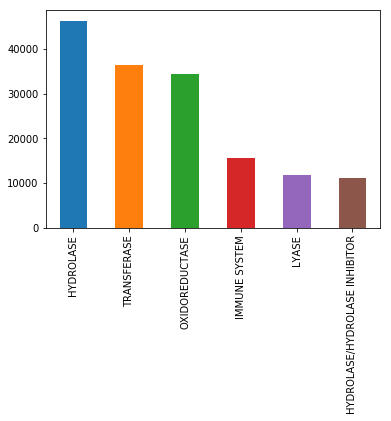

In [50]:
pd.DataFrame(df_fin.classification.value_counts())["classification"][0:6].plot(kind = "bar")

In [51]:
df_fin.groupby("classification").structureId.count().sort_values(ascending=False)[0:6].keys()

Index(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM', 'LYASE',
       'HYDROLASE/HYDROLASE INHIBITOR'],
      dtype='object', name='classification')

In [52]:
df_fin.shape

(346321, 3)

In [53]:
gh = df_fin[df_fin["classification"] == "Protein"]

In [54]:
df_fin.shape

(346321, 3)

In [55]:
#df_fin.loc[df_fin['sequence'].str.contains('(^XXXX)+')]

In [56]:
index_to_drop = df_fin.loc[df['sequence'].str.contains('(^XXXX)+')].index

C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [57]:
df_fin.drop(index = index_to_drop, inplace = True)

In [58]:
df_fin.shape

(344956, 3)

In [59]:
df_prot = df_fin[["structureId", "classification", "sequence"]]

In [60]:
df_prot["seq_length"] = df_prot["sequence"].apply(len)

In [61]:
df_prot = df_prot[df_prot['seq_length'] > 20]

In [62]:
clas_prot = df_prot.groupby("classification").structureId.count().sort_values(ascending = False)[0:25]

In [63]:
df_prot_fin = df_prot[df_prot['classification'].isin(clas_prot.keys())]


In [64]:
df_prot_fin.shape

(241379, 4)

### I have decided to take random samples out of the final DF, because it was numerically exhaustive

In [65]:
sample = df_prot_fin.sample(n=120000, replace=True)

In [66]:
from nltk import word_tokenize, ngrams

### Making ngrams out of the sequence DF had and creating a new feature column called N_seq

In [67]:
def n_grams(cols):
    #cols[0] = sequence
    return [(''.join(x)) for x in ngrams(cols, 3)]

sample["N_seq"] = sample['sequence'].apply(n_grams)
sample["N_seq"] =sample["N_seq"].astype(str)

In [98]:
sample.head()

,structureId,classification,sequence,seq_length,N_seq
42093,1P5H,TRANSFERASE,MTKPLDGINVLDFTHVQAGPACTQMMGFLGANVIKIERRGSGDMTR...,428,"['MTK', 'TKP', 'KPL', 'PLD', 'LDG', 'DGI', 'GI..."
183338,3J3Q,VIRUS,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...,231,"['PIV', 'IVQ', 'VQN', 'QNL', 'NLQ', 'LQG', 'QG..."
172810,3H09,HYDROLASE,ALVRDDVDYQIFRDFAENKGRFSVGATNVEVRDKNNHSLGNVLPNG...,989,"['ALV', 'LVR', 'VRD', 'RDD', 'DDV', 'DVD', 'VD..."
228408,3TCX,CELL ADHESION,MNVDLVFLFDGSMSLQPDEFQKILDFMKDVMKKLSNTSYQFAAVQF...,180,"['MNV', 'NVD', 'VDL', 'DLV', 'LVF', 'VFL', 'FL..."
121810,2Q3Z,TRANSFERASE,MAEELVLERCDLELETNGRDHHTADLCREKLVVRRGQPFWLTLHFE...,687,"['MAE', 'AEE', 'EEL', 'ELV', 'LVL', 'VLE', 'LE..."


In [68]:
#df_final.to_csv("w2vDF.csv")

In [70]:
sample.to_csv("sample.csv", sep = ",")

### Train-test Split using the feature column that was just made 

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test,y_train,y_test = train_test_split(sample['N_seq'], sample['classification'], test_size = 0.3 
                                                  )

In [101]:
from nltk import word_tokenize, ngrams

In [106]:
#X_train, X_test,y_train,y_test = train_test_split(sample['N_seq'], sample['classification'], test_size = 0.3 
                                                  #)

In [107]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


In [108]:
#sample['N_seq'].head()

In [109]:
import nltk.data


In [110]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

### This code is taken from [Kaggle tutorial](https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors)

### The code below tokenize the features and prepares it for the the 300 dimensional matrix for each occurence of 3grams

In [111]:
def review_to_wordlist( review, remove_stopwords=False ):
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [112]:
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        
        if len(raw_sentence) > 0:
            
            # Otherwise, call review_to_wordlist to get a list of words
            
            sentences.append( review_to_wordlist( raw_sentence, remove_stopwords ))
    return sentences

In [113]:
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
for review in sample["N_seq"]:
    sentences += review_to_sentences(review, tokenizer)

#print ("Parsing sentences from unlabeled set")
#for review in unlabeled_train["review"]:
    #sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


In [114]:
#model.most_similar("ail")

In [115]:
#"aiw"

In [116]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

### Creating word2vec for all the features words 

In [117]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)

model_name = "300features_10minwords_10context"
model.save(model_name)

Training model...


2019-03-07 23:59:34,329 : INFO : collecting all words and their counts
2019-03-07 23:59:34,804 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-07 23:59:39,505 : INFO : PROGRESS: at sentence #10000, processed 2879444 words, keeping 8130 word types
2019-03-07 23:59:43,655 : INFO : PROGRESS: at sentence #20000, processed 5742711 words, keeping 8202 word types
2019-03-07 23:59:49,523 : INFO : PROGRESS: at sentence #30000, processed 8614854 words, keeping 8257 word types
2019-03-07 23:59:56,394 : INFO : PROGRESS: at sentence #40000, processed 11515823 words, keeping 8371 word types
2019-03-08 00:00:11,757 : INFO : PROGRESS: at sentence #50000, processed 14382368 words, keeping 8392 word types
2019-03-08 00:00:30,295 : INFO : PROGRESS: at sentence #60000, processed 17280972 words, keeping 8415 word types
2019-03-08 00:00:49,502 : INFO : PROGRESS: at sentence #70000, processed 20152180 words, keeping 8437 word types
2019-03-08 00:00:59,951 : INFO : PROGRESS:

2019-03-08 00:02:39,061 : INFO : EPOCH 1 - PROGRESS: at 40.45% examples, 235262 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:02:40,121 : INFO : EPOCH 1 - PROGRESS: at 41.54% examples, 237492 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:02:41,121 : INFO : EPOCH 1 - PROGRESS: at 42.62% examples, 239656 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:02:42,143 : INFO : EPOCH 1 - PROGRESS: at 43.70% examples, 241799 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:02:43,172 : INFO : EPOCH 1 - PROGRESS: at 44.80% examples, 244069 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:02:44,200 : INFO : EPOCH 1 - PROGRESS: at 45.92% examples, 246414 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:02:45,205 : INFO : EPOCH 1 - PROGRESS: at 47.05% examples, 248611 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:02:46,205 : INFO : EPOCH 1 - PROGRESS: at 48.17% examples, 250585 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:02:47,219 : INFO : EPOCH 1 - PROGRESS: at 49.26% examples, 252399 words/s, in_qsiz

2019-03-08 00:03:51,152 : INFO : EPOCH 2 - PROGRESS: at 18.63% examples, 395384 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:03:52,155 : INFO : EPOCH 2 - PROGRESS: at 19.79% examples, 394989 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:03:53,168 : INFO : EPOCH 2 - PROGRESS: at 20.86% examples, 393783 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:03:54,172 : INFO : EPOCH 2 - PROGRESS: at 22.02% examples, 394612 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:03:55,199 : INFO : EPOCH 2 - PROGRESS: at 23.19% examples, 394686 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:03:56,217 : INFO : EPOCH 2 - PROGRESS: at 24.47% examples, 395727 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:03:57,231 : INFO : EPOCH 2 - PROGRESS: at 25.69% examples, 396624 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:03:58,231 : INFO : EPOCH 2 - PROGRESS: at 26.88% examples, 397149 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:03:59,258 : INFO : EPOCH 2 - PROGRESS: at 28.05% examples, 397496 words/s, in_qsiz

2019-03-08 00:05:02,206 : INFO : EPOCH - 2 : training on 34580654 raw words (34573124 effective words) took 87.3s, 396041 effective words/s
2019-03-08 00:05:03,339 : INFO : EPOCH 3 - PROGRESS: at 1.11% examples, 366696 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:05:04,351 : INFO : EPOCH 3 - PROGRESS: at 2.30% examples, 393135 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:05:05,365 : INFO : EPOCH 3 - PROGRESS: at 3.54% examples, 400393 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:05:06,381 : INFO : EPOCH 3 - PROGRESS: at 4.79% examples, 403723 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:05:07,398 : INFO : EPOCH 3 - PROGRESS: at 6.01% examples, 407145 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:05:08,430 : INFO : EPOCH 3 - PROGRESS: at 7.21% examples, 407881 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:05:09,430 : INFO : EPOCH 3 - PROGRESS: at 8.44% examples, 409628 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:05:10,447 : INFO : EPOCH 3 - PROGRESS: at 9.70% examples, 4108

2019-03-08 00:06:16,601 : INFO : EPOCH 3 - PROGRESS: at 88.05% examples, 409721 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:17,602 : INFO : EPOCH 3 - PROGRESS: at 89.23% examples, 409718 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:18,613 : INFO : EPOCH 3 - PROGRESS: at 90.44% examples, 409787 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:06:19,629 : INFO : EPOCH 3 - PROGRESS: at 91.58% examples, 409438 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:20,649 : INFO : EPOCH 3 - PROGRESS: at 92.74% examples, 409290 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:21,682 : INFO : EPOCH 3 - PROGRESS: at 93.92% examples, 409166 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:22,708 : INFO : EPOCH 3 - PROGRESS: at 95.10% examples, 408894 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:23,741 : INFO : EPOCH 3 - PROGRESS: at 96.30% examples, 408663 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:06:24,758 : INFO : EPOCH 3 - PROGRESS: at 97.50% examples, 408615 words/s, in_qsiz

2019-03-08 00:07:26,949 : INFO : EPOCH 4 - PROGRESS: at 68.19% examples, 393136 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:07:27,967 : INFO : EPOCH 4 - PROGRESS: at 69.38% examples, 393353 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:07:28,965 : INFO : EPOCH 4 - PROGRESS: at 70.56% examples, 393645 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:07:29,972 : INFO : EPOCH 4 - PROGRESS: at 71.74% examples, 393903 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:07:30,978 : INFO : EPOCH 4 - PROGRESS: at 72.93% examples, 394125 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:07:31,981 : INFO : EPOCH 4 - PROGRESS: at 74.11% examples, 394409 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:07:33,008 : INFO : EPOCH 4 - PROGRESS: at 75.36% examples, 394611 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:07:34,042 : INFO : EPOCH 4 - PROGRESS: at 76.54% examples, 394802 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:07:35,075 : INFO : EPOCH 4 - PROGRESS: at 77.80% examples, 395101 words/s, in_qsiz

2019-03-08 00:08:37,953 : INFO : EPOCH 5 - PROGRESS: at 50.04% examples, 405964 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:08:38,965 : INFO : EPOCH 5 - PROGRESS: at 51.20% examples, 406063 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:08:39,966 : INFO : EPOCH 5 - PROGRESS: at 52.42% examples, 406141 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:08:40,996 : INFO : EPOCH 5 - PROGRESS: at 53.62% examples, 406262 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:08:41,995 : INFO : EPOCH 5 - PROGRESS: at 54.82% examples, 406320 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:08:43,011 : INFO : EPOCH 5 - PROGRESS: at 56.04% examples, 406493 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:08:44,027 : INFO : EPOCH 5 - PROGRESS: at 57.25% examples, 406460 words/s, in_qsize 7, out_qsize 0
2019-03-08 00:08:45,044 : INFO : EPOCH 5 - PROGRESS: at 58.48% examples, 406657 words/s, in_qsize 8, out_qsize 0
2019-03-08 00:08:46,060 : INFO : EPOCH 5 - PROGRESS: at 59.64% examples, 406628 words/s, in_qsiz

In [118]:
import numpy as np

### Averaging all the vectors that is present in a specific row.

In [119]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [120]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

### Getting vectors for the training purposes

In [121]:
# Calculating average feature vector for training set
clean_train_reviews = []
for review in X_train:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

Review 0 of 84000


C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 1000 of 84000
Review 2000 of 84000
Review 3000 of 84000
Review 4000 of 84000
Review 5000 of 84000
Review 6000 of 84000
Review 7000 of 84000
Review 8000 of 84000
Review 9000 of 84000
Review 10000 of 84000
Review 11000 of 84000
Review 12000 of 84000
Review 13000 of 84000
Review 14000 of 84000
Review 15000 of 84000
Review 16000 of 84000
Review 17000 of 84000
Review 18000 of 84000
Review 19000 of 84000
Review 20000 of 84000
Review 21000 of 84000
Review 22000 of 84000
Review 23000 of 84000
Review 24000 of 84000
Review 25000 of 84000
Review 26000 of 84000
Review 27000 of 84000
Review 28000 of 84000
Review 29000 of 84000
Review 30000 of 84000
Review 31000 of 84000
Review 32000 of 84000
Review 33000 of 84000
Review 34000 of 84000
Review 35000 of 84000
Review 36000 of 84000
Review 37000 of 84000
Review 38000 of 84000
Review 39000 of 84000
Review 40000 of 84000
Review 41000 of 84000
Review 42000 of 84000
Review 43000 of 84000
Review 44000 of 84000
Review 45000 of 84000
Review 46000 of 840

In [122]:
trainDataVecs

array([[-0.0099359 , -0.04593818, -0.05772187, ..., -0.0659002 ,
         0.08493751, -0.08936053],
       [ 0.08523012, -0.1571173 , -0.09983841, ...,  0.24519007,
        -0.0612287 ,  0.07201509],
       [-0.13481998,  0.08861449, -0.24105223, ...,  0.04254644,
         0.01725568, -0.10314042],
       ...,
       [-0.27610984, -0.09315978, -0.06815444, ...,  0.31424785,
        -0.1245511 , -0.10595381],
       [-0.16137639, -0.1306625 , -0.12084016, ...,  0.35851717,
         0.01010706, -0.03451362],
       [-0.00563055, -0.03304921, -0.0480267 , ...,  0.19154586,
        -0.04711775, -0.0251325 ]], dtype=float32)

In [123]:
trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )


Review 0 of 84000


C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 1000 of 84000
Review 2000 of 84000
Review 3000 of 84000
Review 4000 of 84000
Review 5000 of 84000
Review 6000 of 84000
Review 7000 of 84000
Review 8000 of 84000
Review 9000 of 84000
Review 10000 of 84000
Review 11000 of 84000
Review 12000 of 84000
Review 13000 of 84000
Review 14000 of 84000
Review 15000 of 84000
Review 16000 of 84000
Review 17000 of 84000
Review 18000 of 84000
Review 19000 of 84000
Review 20000 of 84000
Review 21000 of 84000
Review 22000 of 84000
Review 23000 of 84000
Review 24000 of 84000
Review 25000 of 84000
Review 26000 of 84000
Review 27000 of 84000
Review 28000 of 84000
Review 29000 of 84000
Review 30000 of 84000
Review 31000 of 84000
Review 32000 of 84000
Review 33000 of 84000
Review 34000 of 84000
Review 35000 of 84000
Review 36000 of 84000
Review 37000 of 84000
Review 38000 of 84000
Review 39000 of 84000
Review 40000 of 84000
Review 41000 of 84000
Review 42000 of 84000
Review 43000 of 84000
Review 44000 of 84000
Review 45000 of 84000
Review 46000 of 840

### Getting vectors for the testing purposes

In [124]:
print ("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in X_test:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

Creating average feature vecs for test reviews
Review 0 of 36000


C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 1000 of 36000
Review 2000 of 36000
Review 3000 of 36000
Review 4000 of 36000
Review 5000 of 36000
Review 6000 of 36000
Review 7000 of 36000
Review 8000 of 36000
Review 9000 of 36000
Review 10000 of 36000
Review 11000 of 36000
Review 12000 of 36000
Review 13000 of 36000
Review 14000 of 36000
Review 15000 of 36000
Review 16000 of 36000
Review 17000 of 36000
Review 18000 of 36000
Review 19000 of 36000
Review 20000 of 36000
Review 21000 of 36000
Review 22000 of 36000
Review 23000 of 36000
Review 24000 of 36000
Review 25000 of 36000
Review 26000 of 36000
Review 27000 of 36000
Review 28000 of 36000
Review 29000 of 36000
Review 30000 of 36000
Review 31000 of 36000
Review 32000 of 36000
Review 33000 of 36000
Review 34000 of 36000
Review 35000 of 36000


### Using the training vectors and testing vector for our classifers

In [125]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )

print ("Fitting a random forest to labeled training data...")
forest = forest.fit(trainDataVecs, y_train )

# Test & extract results 
result = forest.predict(testDataVecs )


Fitting a random forest to labeled training data...


In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [127]:
print(accuracy_score(y_test, result))

0.8770833333333333


### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lg = LogisticRegression().fit(trainDataVecs, y_train)

In [130]:
yhattt = lg.predict(testDataVecs)

In [131]:
print(accuracy_score(y_test, yhattt))

0.44230555555555556


### Linear SVC

In [132]:
from sklearn.svm import LinearSVC
lsv = LinearSVC()
lsv.fit(trainDataVecs, y_train)
yh3 = lsv.predict(testDataVecs)
print(accuracy_score(y_test, yh3))

0.4365277777777778


### The Random Forest outperforms all the classifiers.
### Multinomial NB doesnot work in this case as the training and testing vector contains negative values which it cannot process

### This model (word2vec) for protein classifications has many improvements to be done.
* The number of n grams needs to be tuned for it. It might be that 4 or 3 grams may work well, because it might not captures the essence of the function. May be try longer ones

* Train the whole DF, since  this only contains randomly selected 120000 rows

* Literature review suggests, few research have tried word2vec to tackle protein classification. 

* Word2vec works really well with pretrained data. People used google pretrained words to make vectors which have similar and semantic realtionship. We dont have a pretrained dataset for proteins that captures functional relationship based on n grams that we have used.

* This is very much numerically demanding process. Since it depends on the length of the proteins and after creating n grams, it just increases the number of features too much as compared to when analyzing sentiment or review analysis(which could be trained with pretrained data)

* Nevertheless word2vec is a powerful tool to learn to tackle problems related to real world texts